In [3]:
import Bio
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# importing data from fasta files

for record in SeqIO.parse("SARS-CoV-2.fasta", "fasta"):
    SARS = record.seq

for record in SeqIO.parse("Figure1Figure2_032321.fasta", "fasta"):
    if 'Moderna' in record.id:
        moderna = record.seq
    else:
        pfizer = record.seq

In [5]:
# from DNA to RNA
mrna_SARS = SARS.transcribe()
mrna_moderna = moderna.transcribe()
mrna_pfizer = pfizer.transcribe()

# Q1

Create a function that takes mRNA as an input and returns the translated coding region (Hint 1: you need to find the initiation codon and the stop codon. Hint 2: use BioPython!)

In [6]:
def coding_region(mrna):
    start = 'ATG'
    stop = ['TAG','TAA','TGA']

    start_index = mrna.find(start)+3
    catch = np.arange(start_index, len(mrna), 3)
    
    for i in catch:
        codon = mrna[i : i+3]
        if codon in stop:
            stop_index = i
            break
            
    return mrna[start_index:stop_index]

# Q2

1. What’s the position of the initiation codon (“AUG”)?

In [7]:
pfizer_start = pfizer.find("ATG")
moderna_start = moderna.find("ATG")
SARS_start = SARS.find("ATG")
                             
print(f'The possition of ATG in pfizer is: {pfizer_start}')
print(f'The possition of ATG in moderna is: {moderna_start}')
print(f'The possition of ATG in SARS is: {SARS_start}')

The possition of ATG in pfizer is: 54
The possition of ATG in moderna is: 57
The possition of ATG in SARS is: 106


2. What’s the position of the termination codon?

In [8]:
pfizer_end = pfizer_start+len(coding_region(pfizer))+3
moderna_end = moderna_start+len(coding_region(moderna))+3
SARS_end = SARS_start+len(coding_region(SARS))+3

print(f'The possition of STOP in pfizer is: {pfizer_end}')
print(f'The possition of STOP in moderna is: {moderna_end}')
print(f'The possition of STOP in SARS is: {SARS_end}')

The possition of STOP in pfizer is: 3873
The possition of STOP in moderna is: 3876
The possition of STOP in SARS is: 133


3. What sequence did each company use for the stop codon?

In [9]:
stop = ['TAG','TAA','TGA']

# finding the stop codon length for pfizer
pfizer_counter = 0

for i in range(pfizer_end, len(pfizer),3):
    if pfizer[i : i+3] in stop:
        pfizer_counter+=3
    else:
        break

# finding the stop codon length for moderna
moderna_counter= 0

for i in range(moderna_end, len(moderna),3):
    if moderna[i : i+3] in stop:
        moderna_counter+=3
    else:
        break
        
print(f'pfizer used {pfizer[pfizer_end:pfizer_end+pfizer_counter]} as stop codon')
print(f'moderna used {moderna[moderna_end:moderna_end+moderna_counter]} as stop codon')

pfizer used TGATGA as stop codon
moderna used TGATAATAG as stop codon


4. Please suggest another stop codon sequence.

In [10]:
import random

alter_stop = ''
num_of_end_codons = 3 # to be selected by whom 
for codon in range (num_of_end_codons):
    alter_stop += random.choice(stop)
        
print("Alternative stop codon : " + str(alter_stop))

Alternative stop codon : TAATAGTAG


5. How would you call the area between the first nucleotide and the “AUG” site?

 The area between the first nucleotide and the “AUG” site is called: Putative 5’ UTR

6. How would you call the area between the termination codon and the last nucleotide?

The area between the termination codon and the last nucleotide is divided into 2 parts:
1. 3’ UTR
2. polyA region

# Q3

Using your function, translate the coding area into protein. What’s the length of each coding sequence?

In [11]:
pfizer_protein = coding_region(pfizer).translate()
moderna_protein = coding_region(moderna).translate()

In [12]:
print(f'The length of pfizer sequence is {len(pfizer_protein)}')
print(f'The length of moderna sequence is {len(moderna_protein)}')

The length of pfizer sequence is 1272
The length of moderna sequence is 1272


# Q4

Are the coding regions of the vaccines identical in the protein level?

In [13]:
print(pfizer_protein==moderna_protein)

True


# Q5

Are the coding regions of the vaccines identical in the nucleotide level?

In [14]:
print(coding_region(pfizer)==coding_region(moderna))

False


# Q6

Create a histogram of amino-acids usage for the Pfizer vaccine

In [15]:
def protein_frequency(seq):
    dicto = {}
    for n in seq:
        keys = dicto.keys()
        if n in keys:
            dicto[n] += 1
        else:
            dicto[n] = 1
    return dicto

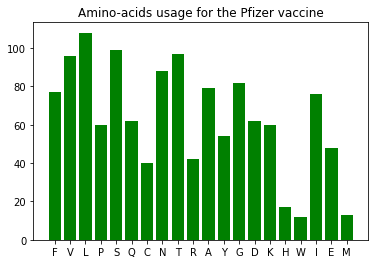

In [16]:
hist_data = protein_frequency(pfizer_protein)

plt.bar(list(hist_data.keys()), hist_data.values(), color='g')
plt.title('Amino-acids usage for the Pfizer vaccine')
plt.show()

# Q7

Create the same histogram but color each codon within the amino-acid (i.e. create a stacked histogram)

In [17]:
def codon_frequency(seq):
    dicto = {}
    for i in range(0,len(seq),3):
        keys = dicto.keys()
        if seq[i : i+3] in keys:
            dicto[seq[i : i+3]] += 1
        else:
            dicto[seq[i : i+3]] = 1
    return dicto

In [18]:
def codon_dict_to_protein_dict (dicto):
    table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                 
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }
    dict_protein = {}
    for i in range(len(dicto)):
        keys = dict_protein.keys()
        temp_protein = table[str(list(dicto.keys())[i])]

        if temp_protein in keys:
            dict_protein[temp_protein][str(list(dicto.keys())[i])] = list(dicto.values())[i]
        else:
            dict_protein[temp_protein] = {str(list(dicto.keys())[i]) : list(dicto.values())[i]}
    return dict_protein

In [19]:
pfizer_seq = coding_region(pfizer)
pfizer_codon_dict = codon_frequency(pfizer_seq)
data_to_hist = codon_dict_to_protein_dict (pfizer_codon_dict)

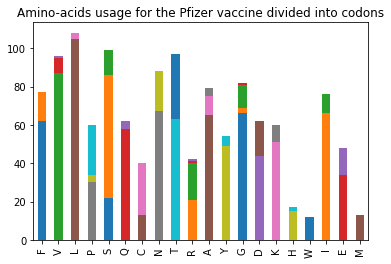

In [20]:
df = pd.DataFrame(data_to_hist)
df = df.transpose()
df.plot(kind="bar", stacked=True, legend = None)
plt.title('Amino-acids usage for the Pfizer vaccine divided into codons')
plt.show()

# Q8

What’s the length of the Wuhan strain genome?

In [21]:
print(f'The total length of Wuhan genome is: {len(SARS)}')

The total length of Wuhan genome is: 29903


# Q9

Report the nucleotide sequence of the Spike region of the Wuhan strain from the initiation codon to the termination codon (hint: use the information in the NCBI website about the starting and stopping position of Spike). 

In [22]:
print(f'According to NCBI website, the spike of Wuhan strain starts at possition 21563 (counter satrst at 1) and ends at 25384 \n')
SARS_coding_region = SARS[21562:25384]
print(f'That is mean that the sequence is:\n{SARS_coding_region}')

According to NCBI website, the spike of Wuhan strain starts at possition 21563 (counter satrst at 1) and ends at 25384 

That is mean that the sequence is:
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAA

# Q10

Report the GC content of the Spike region of the Wuhan strain and compare it to the GC content of the Spike region of the Pfizer vaccine.

In [23]:
def count_GC(seq):
    counter = 0
    for i in seq:
        if i == 'C' or i == 'G':
            counter+=1
    return counter

In [24]:
print(f'The GC content of the Spike region of the Wuhan strain is: {count_GC(SARS_coding_region[3:])} (without the start codon)')
print(f'The GC content of the Spike region of pfizer strain is: {count_GC(pfizer_seq)} (without the start codon)')

The GC content of the Spike region of the Wuhan strain is: 1425 (without the start codon)
The GC content of the Spike region of pfizer strain is: 2176 (without the start codon)


# Q11

Translate the sequence into amino acids and report the sequence of the protein

In [25]:
SARS_protein = SARS_coding_region[3:len(SARS_coding_region)-3].translate()
print(SARS_protein)

FVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRL

# Q12

Compare between the Spike region of the Pfizer vaccine to the Spike of the Wuhan strain in the protein level. Are there any differences and where?
Bonus: explain the differences!


In [26]:
len(SARS_protein), len(pfizer_protein)

(1272, 1272)

In [27]:
# finding the indices of difference
index_of_diff = []
for i in range(len(SARS_protein)):
    if SARS_protein[i] != pfizer_protein[i]:
        index_of_diff.append(i)
        
for index in index_of_diff:
    print(f'There is difference in index {index}: pfizer - {pfizer_protein[index]}, SARS - {SARS_protein[index]}')

There is difference in index 984: pfizer - P, SARS - K
There is difference in index 985: pfizer - P, SARS - V


## Explenation:
The K and V amino acids there are both replaced by ‘P’
(Proline). The spikes are mounted on the virus body (‘the
nucleocapsid protein’). But Pfizer vaccine is only generating the
spikes itself, because of that we’re not mounting them on any
kind of virus body. Proline substitution in just the right
place would make proteins take up their ‘pre-fusion’
configuration, even without being part of the whole virus - this
works because Proline is a very rigid amino acid. It acts as a
kind of splint, stabilizing to show to the immune system

# Q13

For the amino acids that appear in the vaccine and the Wuhan strain, create a look-up table that maps between the Wuhan strain codon to the Pfizer codon

In [28]:
# mapping from SARS to pfizer

SARS_seq = SARS_coding_region[3:len(SARS_coding_region)-3]
pfizer_seq
look_up_SARS_to_pfizer = {}
for i in range(0,len(pfizer_seq),3):
    if SARS_seq[i:i+3] in look_up_SARS_to_pfizer.keys():
        if str(pfizer_seq[i:i+3]) not in look_up_SARS_to_pfizer[str(SARS_seq[i:i+3])]:
            look_up_SARS_to_pfizer[str(SARS_seq[i:i+3])].append(str(pfizer_seq[i:i+3]))
    else:
        look_up_SARS_to_pfizer[str(SARS_seq[i:i+3])] = [str(pfizer_seq[i:i+3])]

#show the first 5 items in the look-up map
look_up_SARS_to_pfizer

{'TTT': ['TTC', 'TTT'],
 'GTT': ['GTG', 'GTC', 'CCT'],
 'CTT': ['CTG'],
 'TTA': ['CTG', 'CTC'],
 'TTG': ['CTG', 'CTC'],
 'CCA': ['CCT', 'CCC'],
 'CTA': ['CTG'],
 'GTC': ['GTG', 'GTT', 'GTC'],
 'TCT': ['TCC', 'AGC', 'TCT'],
 'AGT': ['AGC', 'TCT'],
 'CAG': ['CAG'],
 'TGT': ['TGT', 'TGC'],
 'AAT': ['AAC', 'AAT'],
 'ACA': ['ACC', 'ACA'],
 'ACC': ['ACC', 'ACA'],
 'AGA': ['AGA', 'CGG', 'AGG'],
 'ACT': ['ACA', 'ACC'],
 'CAA': ['CAG', 'CAA'],
 'CCC': ['CCT', 'CCC'],
 'CCT': ['CCA', 'CCC', 'CCT'],
 'GCA': ['GCC', 'GCT', 'GCA'],
 'TAC': ['TAC', 'TAT'],
 'TTC': ['TTT', 'TTC'],
 'CGT': ['AGA', 'CGG'],
 'GGT': ['GGC', 'GGG', 'GGA', 'GGT'],
 'TAT': ['TAC', 'TAT'],
 'GAC': ['GAC', 'GAT'],
 'AAA': ['AAG', 'AAA', 'CCT'],
 'TCC': ['TCC', 'AGC'],
 'TCA': ['AGC', 'TCT', 'TCC'],
 'CAT': ['CAC', 'CAT'],
 'TGG': ['TGG'],
 'GCT': ['GCC', 'GCT', 'GCA'],
 'ATA': ['ATC', 'ATT'],
 'GGG': ['GGC', 'GGA'],
 'AAG': ['AAG', 'AAA'],
 'AGG': ['AGA', 'CGC', 'CGG'],
 'GAT': ['GAC', 'GAT'],
 'AAC': ['AAC', 'AAT'],
 'GAG': 

# Q14

Can you deduce any rule about the look-up table that Pfizer uses internally?
Bonus: explain the differences!


In [29]:
# dict_values_lst = list(look_up_SARS_to_pfizer.values())
# codon_diff = []

# for i in range(len(dict_values_lst)):
#     if dict_values_lst[i][0] != dict_values_lst[i][1]:
#         codon_diff.append(dict_values_lst[i][1])

In [30]:
# positions of same codons that has one to many in look up map  
indicies = []
total_codon_similarity = 0
for i in range(0,len(pfizer_seq),3):
    if SARS_seq[i:i+3] == pfizer_seq[i:i+3]:
        total_codon_similarity +=1
        if len(look_up_SARS_to_pfizer[str(SARS_seq[i:i+3])]) == 1:
            continue
        else:
            indicies.append(i)
print(f'There are in total {total_codon_similarity} similar codons',
      f'\nwhich {len(indicies)} of them are one-to-many',
      f'\nand therefore they could choose another codon but did not\n')
print(indicies)

There are in total 351 similar codons 
which 307 of them are one-to-many 
and therefore they could choose another codon but did not

[39, 54, 57, 78, 108, 114, 123, 126, 129, 153, 159, 165, 168, 189, 213, 216, 225, 237, 270, 282, 285, 291, 300, 303, 333, 336, 360, 381, 429, 432, 438, 441, 456, 462, 465, 492, 516, 528, 534, 552, 573, 576, 579, 612, 615, 621, 633, 639, 645, 660, 666, 678, 696, 699, 708, 732, 747, 753, 771, 774, 777, 786, 792, 795, 810, 846, 867, 879, 891, 894, 909, 912, 921, 930, 945, 966, 987, 1002, 1026, 1029, 1032, 1041, 1056, 1062, 1068, 1071, 1107, 1128, 1140, 1146, 1167, 1209, 1212, 1245, 1287, 1311, 1344, 1347, 1368, 1374, 1389, 1410, 1413, 1419, 1425, 1431, 1434, 1446, 1461, 1491, 1497, 1518, 1521, 1542, 1551, 1575, 1590, 1602, 1605, 1617, 1620, 1623, 1638, 1656, 1662, 1668, 1680, 1689, 1692, 1728, 1737, 1752, 1842, 1851, 1866, 1875, 1887, 1917, 1923, 1938, 1941, 1965, 1977, 1983, 1989, 2007, 2037, 2040, 2070, 2073, 2076, 2079, 2115, 2124, 2127, 2139, 2163, 2166,

It is noticable that pfizer's rule for codon selection is to use a codon that contains the maximum C or G nocleotid based, and however correspond to the same protein as in the SARS protein

##### Explanation:
These codons are stronger and it is harder to separate them, thus it has much more resistance. It is important due to the reason that the vaccine need to be transported and stored for long times, and if it won't be resistant, it can be damaged and will not function.

# Q15

Without aligning, develop an algorithm to quickly sift through the 75000 genomes and find all entries that can match the South Afircan variant (hint: mutations occur very rarely. You can assume that positions adjacent to the mutated sites are identical to the Wuhan strain).

In [31]:
[SARS[23011], SARS[23062], SARS[21800]]

['G', 'A', 'A']

In [32]:
def sa_var(path_to_file, d):
    # d denote for the number of nuc from each side of the "bad" nuc
    
    first = SARS[23011-d:23011] + 'A' + SARS[23012:23012+d]
    second = SARS[23062-d:23062] + 'T' + SARS[23063:23063+d]
    third = SARS[21800-d:21800] + 'C' + SARS[21801:21801+d]

    lst_of_id = []
    lst_of_countries = []

    with open(path_to_file, mode='r') as handle:
        for record in SeqIO.parse(handle, 'fasta'):
            identifier = record.id
            description = record.description
            sequence = record.seq

            index = (description.find('human'))
            index2 = (description.find('/', index+1))
            index3 = (description.find('/', index2+1))

            if (sequence.find(first) != -1) and (sequence.find(second) != -1) and (sequence.find(third) != -1):
                lst_of_id.append(identifier)
                lst_of_countries.append(description[index2+1:index3])
    
    return lst_of_id, lst_of_countries

In [33]:
path_to_file = 'sequences.fasta'
id_lst, countries = sa_var(path_to_file, 20)

# Q16


Report all entries in your collection that you think match the South Afican variant. Where were they collected? Does it make sense?


In [ ]:
id_lst,countries

In [34]:
len(id_lst)

45

In [35]:
np.unique(countries)

array(['DEU', 'FRA', 'GHA',
       'HG999935.1 |Severe acute respiratory syndrome coronavirus 2 isolate a1244 genome assembly, complete genome: monopartit',
       'HG999939.1 |Severe acute respiratory syndrome coronavirus 2 isolate a1245 genome assembly, complete genome: monopartit',
       'ITA', 'USA'], dtype='<U118')

The SA variant appeard in Deutschland, France, Ghana, Italy and the USA.
Although it was expected that SA would appear as well, it does make sense becuse these countries are highly visited and therefore it is possible.
(In the original DB there is only one sequence from South Africa, however it does not appear in our list).

# Q17

Develop a method to extract the Spike sequence of one of the entries, translate, and report the protein sequence (hint: the South African spike is not very different than the Wuhan strain and must start with AUG).

In [36]:
id_lst[0]

'MW898265.1'

In [37]:
with open('sequences.fasta', mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
        identifier = record.id
        if identifier == 'MW898265.1' :
            sequence = record.seq
            break

In [38]:
def find_spike_sa_var(sequence, d):
    look_up_start = SARS_coding_region[:d]
    start_index = sequence.find(look_up_start)
    stop = ['TAG','TAA','TGA']
    catch = np.arange(start_index, len(sequence), 3)
    
    for i in catch:
        codon = sequence[i : i+3]
        if codon in stop:
            stop_index = i
            break
            
    return sequence[start_index+3:stop_index]


In [39]:
some_sa_var = find_spike_sa_var(sequence, 15)

# Q18

Use everything you learned so far, including the look up table of Pfizer and the addition of special nucleotides to design a South African mRNA vaccine. Don’t forget the add the 5’UTR and 3’UTR. Report the vaccine sequence.

#### step-by-step solution:

1. translate the spike SA variant to protein
2. Find if there are any gaps in the legnth between the spike SARS and the spike varient. If exists - fix the gap temporarly
3. according to Q12, make sure protein in position 984,985 are the same as SARS
4. While having same length - find all diferences between SARS and variant
5. while there is no difference in the protein level, take the codon sequence  
6. If there is change in the protein level, translate the protein randomly according to the table, and change it, if necessary, according to the look-up map that was created. If there are several options for codon, choose the one with the highest GC content
7. add:
    * start codons to the spike
    * stop codons to the spike
    * UTR 5' at the beginning
    * UTR 3' and polyA region at the end


In [42]:
codon_to_protein_table = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                 
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}

# translate the variant to protein
var_translated = some_sa_var.translate()

print(f'There is a gap of {len(SARS_protein)-len(var_translated)} between the SARS and the variant')

# find the gap possition between SARS to variant in protein level
for i in range(len(var_translated)):
    if var_translated[i] == SARS_protein[i]:
        continue
    else:
        if var_translated[i+1] == SARS_protein[i+1]:
            continue
        else:
            ap_possition = i
            break
print(f'The gap possition starts as:{i}')
print(SARS_protein[i:i+3])

# temorarly fixing to the legnth of SARS with adding the "missing" part
## fixing the protein seq
temp_var = var_translated[:239]+'LAL'+var_translated[239:]
## fixing the nuc seq
adjusted_var_codon = some_sa_var[:239*3] + 'LAL'*3 + some_sa_var[239*3:]

# check for difference between SARS and fixed variant
errors = []
for j in range(len(temp_var)):
    if temp_var[j] == SARS_protein[j]:
        continue
    else:
        errors.append(j)

print(f'The gaps between SARS and fixed variant are in possitions {errors}')

# check if 984,985 are the same
print(f'Is 984 & 985 are the same? {temp_var[984:986]==SARS_protein[984:986]}')

# taking pfizer vaccine, however where the variant different from SARS, taking the nuc according to look-up map
nuc_errors = [item * 3 for item in errors]
nuc_errors.append(len(temp_var)*3)
nuc_errors.insert(0,-3)
new_vacc = ''
for p in range(len(nuc_errors)-1):
    new_vacc += pfizer[nuc_errors[p]+3:nuc_errors[p+1]]

    if adjusted_var_codon[nuc_errors[p+1]:nuc_errors[p+1]+3] in look_up_SARS_to_pfizer.keys():
        map_this_nuc = adjusted_var_codon[nuc_errors[p+1]:nuc_errors[p+1]+3]
    else:
        map_this_nuc = list(codon_to_protein_table.keys())[list(codon_to_protein_table.values()).index(temp_var[(p+1)//3])]
    
    temp_lst_map = look_up_SARS_to_pfizer[map_this_nuc]
    best_codon_seq = ''
    best_GC = 0
    for codon in temp_lst_map:
        temp_count = count_GC(codon)
        if temp_count > best_GC:
            best_codon_seq = codon

    new_vacc += best_codon_seq

There is a gap of 3 between the SARS and the variant
The gap possition starts as:240
LAL
The gaps between SARS and fixed variant are in possitions [78, 213, 240, 241, 258, 259, 260, 267, 300, 301, 302, 415, 482, 499, 612, 699]
Is 984 & 985 are the same? True


In [43]:
# initiate the start and end as in pfizer vaccine
sa_vac_start = pfizer[:pfizer_start+3]
sa_vac_end = pfizer[pfizer_end:]

In [44]:
#combine Start+coding region+end
full_new_vacc = sa_vac_start + new_vacc + sa_vac_end
full_new_vacc

Seq('GAGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACCCGCCACC...GCA')